#  Taller Evaluativo: Preprocesamiento y Análisis de Datos de Vivienda

Este cuaderno constituye una **evaluación práctica** donde deberás aplicar técnicas de:

- Limpieza de datos  
- Análisis exploratorio (EDA)  
- Imputación de valores nulos  
- Tratamiento de valores atípicos  
- Codificación de variables categóricas  
- Escalado y reducción de características  
- División en entrenamiento y prueba  

 **Instrucciones:**  
1. Lee con atención cada enunciado (celdas con `#` o en texto explicativo).  
2. Desarrolla el código solicitado en la celda correspondiente.  
3. Después de cada celda de código, redacta una **conclusión o inferencia** en la celda de texto que sigue.  


# <center> ★ Machine Learning Project - Predicción del precio de la vivienda  ★

#### <center> ***Area: Sector Inmobiliario***

---

<center><img src="https://raw.githubusercontent.com/Masterx-AI/Project_Housing_Price_Prediction_/main/hs.jpg" style="width: 700px;"/>

---

## Taller Evaluativo - Preprocesamiento y Preparación de Datos  

Este taller es la aplicación integral de lo aprendido en clase sobre análisis y transformación de datos, desde la **limpieza** hasta la **preparación para el modelado**.  

El flujo de trabajo incluirá:  
- **Análisis exploratorio de datos (EDA)**  
- **Limpieza e imputación de valores nulos**  
- **Tratamiento de valores atípicos**  
- **Codificación de variables categóricas**  
- **Creación y selección de características**  
- **División del conjunto de datos**  
- **Balanceo de clases**  

Lenguaje y librerías a utilizar:  
Python 3.9+ con **Pandas, NumPy, Seaborn, Matplotlib y Scikit-learn**.  
Recomendamos trabajar en **Jupyter Notebook o Google Colab** para facilitar la ejecución y visualización de resultados.  

Importante:  
- Puedes apoyarte en la **IA de la plataforma** para completar el taller.  
- **Cada línea de código debe estar precedida por una celda de texto (Markdown) donde expliques qué acción vas a realizar y por qué**.  

---

## 1. Cargar y explorar el dataset
- Descargar el dataset proporcionado sobre clientes interesados en comprar vivienda.  
- Inspeccionar las primeras filas y las dimensiones del DataFrame.  
- Cambie los nombres de cada columna por su traducción en español.
---

## 2. Transformaciones iniciales
- Verificar si hay nulos es imputar la mediana en valores, numericos y la moda en categoricos.
- Realice el análisis estadistico
- Realizar el análisis gráfico de barras de frecuencia
- Eliminar las columnas que puede ser colineales usando correlación
- Mostrar las primeras filas para verificar las transformaciones.  

---

## 3. Análisis Exploratorio de Datos (EDA)  
- Realizar histogramas con densidad estimada (KDE) para *precio**.  
- Identificar patrones, sesgos o valores atípicos.  

---

## 5. Manejo de valores atípicos (outliers)  
- Aplicar el método **IQR (Rango Intercuartílico)** a total_gastos y credito_a_solicitar.  
- Calcular límites inferior y superior:  
  - Límite inferior = Q1 – 1.5 × IQR  
  - Límite superior = Q3 + 1.5 × IQR  
- Ajustar valores fuera de rango al límite correspondiente (sin eliminarlos).  

---

## 6. Codificación de variables categóricas  
- Aplicar **One-Hot Encoding** a genero, estado_civil y tiene_credito.  
- Eliminar las columnas originales.  
- Explicar cómo la codificación ayuda al modelo.  

---


## 7. División del dataset  
- Dividir en entrenamiento (train) y prueba (test) con un 80/20.  
- Asegurar que la proporción de clases de compro_vivienda se mantenga en ambas particiones (**stratify**).  

---
## 8. Normalice train y luego el test

- Usar **MinMax**.  
- Reconstruir el DataFrame con las más relevantes.  
---

## 8. Selección de características  
- Usar **VarianceThreshold** para eliminar variables con baja varianza.  
- Reconstruir el DataFrame con las más relevantes.  



---

## Entrega  
- Guardar el notebook en formato `.ipynb`.  
- Subirlo a la plataforma del curso.  

---

Recuerda: Cada bloque de código tiene sus instrucciones pero después de ejecutar el codigo debe tener un texto que haga un análisis de los resultados más importantes de la celda previa, explicando **Por qué y que analisis y/o acción debe realizarse para obetener los datos limpios para generar la vista minable**.  



### Referencia:
Harrison, D. and Rubinfeld, D.L. (1978) Hedonic prices and the demand for clean air. J. Environ. Economics and Management 5, 81–102.


---

# <center>1. Data Exploration

### Tarea: Importing the basic librarires

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, MinMaxScaler
from sklearn.feature_selection import VarianceThreshold
import joblib
#se importan las librerias basicas para usar los modelos

**Justificación técnica:** se importal librerias basicas para usar los modelos

###  Tarea: Cargar el dataset y mostra las primeras muestras

In [2]:
# traemos el dataset de github con pd pandas
df = pd.read_csv('https://raw.githubusercontent.com/adiacla/vivienda/refs/heads/main/Housing.csv')

# mostramos los primero con el comando head
display(df.head())

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4.0,2.0,3.0,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,NaN,4.0,4.0,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3.0,2.0,2.0,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4.0,2.0,2.0,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4.0,1.0,2.0,yes,yes,yes,no,yes,2,no,furnished


**Justificación técnica:** traemos el dataset y mostramos el head ue son los primeros datos.

###Tarea: Liste las columnas

In [4]:
# visualizamos los nombres de las columnas o mejor dicho las features
display(df.columns)

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

 **Justificación técnica:** Vemos los nombres de las features.

### Tarea: Traducción de nombres de columnas al español
- Renombrar las columnas en el DataFrame Verificar los nuevos nombres

In [5]:
# Creamos un diccionario para cambiar el nombre de las columnas, pasamos de ingles a español
column_translation = {
    'price': 'precio',
    'area': 'area',
    'bedrooms': 'habitaciones',
    'bathrooms': 'banos',
    'stories': 'pisos',
    'mainroad': 'calle_principal',
    'guestroom': 'cuarto_invitados',
    'basement': 'sotano',
    'hotwaterheating': 'calefaccion_agua',
    'airconditioning': 'aire_acondicionado',
    'parking': 'estacionamiento',
    'prefarea': 'area_preferida',
    'furnishingstatus': 'estado_amueblado'
}

# Se les cambia el nombre con renombrar
df.rename(columns=column_translation, inplace=True)

# Verificamos los nuevos nombres de las features con display columns
display(df.columns)

Index(['precio', 'area', 'habitaciones', 'banos', 'pisos', 'calle_principal',
       'cuarto_invitados', 'sotano', 'calefaccion_agua', 'aire_acondicionado',
       'estacionamiento', 'area_preferida', 'estado_amueblado'],
      dtype='object')

# **Conclusión:** Describe aquí tu interpretación del resultado.

### Tarea: Número de filas y columnas en el DataFrame

In [6]:
# Obtenemos el numero de samples y features con el display que nos muestra el shape, o sea la forma
display(df.shape)

(545, 13)

**Justificación técnica:** obtenemos el numero de samples y features con shape, que es pues la forma

### Tarea: Verificando los tipos de datos de todas las columnas

In [7]:
# Se verifica que tipo de dato tiene la columna con el comando info que nos deja ver que tipo de dato se esta guardando en cada feature
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   precio              545 non-null    int64  
 1   area                545 non-null    int64  
 2   habitaciones        540 non-null    float64
 3   banos               544 non-null    float64
 4   pisos               544 non-null    float64
 5   calle_principal     539 non-null    object 
 6   cuarto_invitados    545 non-null    object 
 7   sotano              545 non-null    object 
 8   calefaccion_agua    544 non-null    object 
 9   aire_acondicionado  545 non-null    object 
 10  estacionamiento     545 non-null    int64  
 11  area_preferida      544 non-null    object 
 12  estado_amueblado    542 non-null    object 
dtypes: float64(3), int64(3), object(7)
memory usage: 55.5+ KB


None

 **Justificación técnica:** con el comando info vemos que tipo de datos se estan guardando en cada seccion del df

### Tarea: Eliminación de filas duplicadas (si existen)

- Guardamos las dimensiones originales del DataFrame
- Eliminamos duplicados directamente en el DataFrame
- Verificamos si hubo cambios

In [8]:
# Hacemos una copia de el df original
original_shape = df.shape
print(f"Original shape: {original_shape}")

# todos los duplicados se van con el comando drop
df.drop_duplicates(inplace=True)

# se verifica si cambió
new_shape = df.shape
print(f"New shape after removing duplicates: {new_shape}")

if original_shape == new_shape:
    print("No duplicate rows were found.")
else:
    print(f"{original_shape[0] - new_shape[0]} duplicate rows were removed.")

Original shape: (545, 13)
New shape after removing duplicates: (545, 13)
No duplicate rows were found.


**Justificación técnica:** Hacemos una copia del df original. sacamos todos los duplicados con el true y verificamos y cambió y si no tiene duplicados

###  Tarea: Análisis de valores nulos en el DataFrame

- Verificar el número total de valores nulos por columna
- Verificar el porcentaje de valores nulos por columna
- Visualizar los valores nulos con un gráfico de calor con mapa de calor

,0
precio,0
area,0
habitaciones,5
banos,1
pisos,1
calle_principal,6
cuarto_invitados,0
sotano,0
calefaccion_agua,1
aire_acondicionado,0


,0
precio,0.000000
area,0.000000
habitaciones,0.917431
banos,0.183486
pisos,0.183486
calle_principal,1.100917
cuarto_invitados,0.000000
sotano,0.000000
calefaccion_agua,0.183486
aire_acondicionado,0.000000


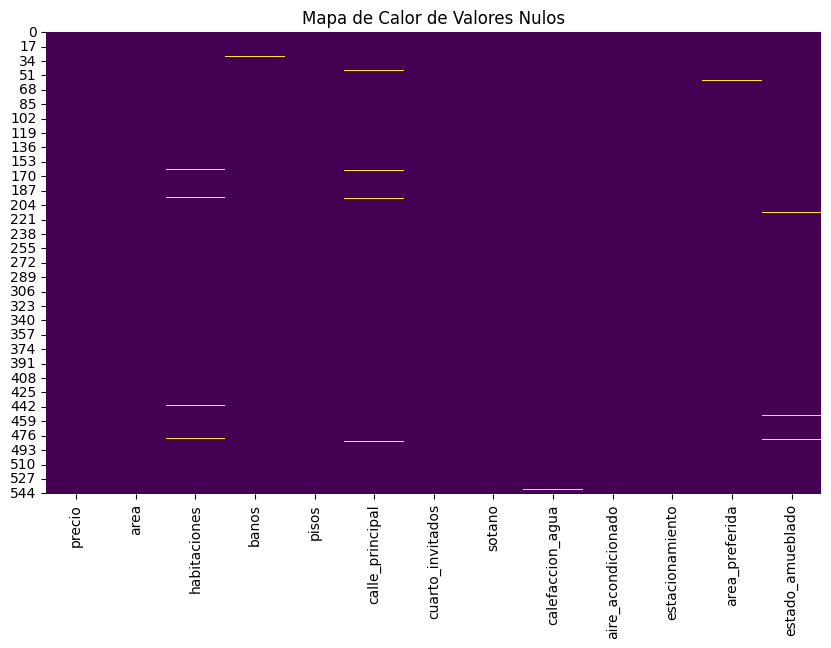

In [9]:
# Buscamos todas las casillas donde hayan nulos y los sumamos
display(df.isnull().sum())

# Verificamos el porcentaje de nulos con una formula sencilla ayudandonos del tamaño del df con len(df)
display(df.isnull().sum() / len(df) * 100)

# Visualizamos los valores nulos con ayuda de plt y el heatmap (mapa de calor)
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Mapa de Calor de Valores Nulos')
plt.show()

**Justificación técnica:** buscamos todas las casillas que tengan nulos con el.isnull y hacemos un mapa de calor donde hayan nulos en nuestro df

###  Tarea: Imputación de valores nulos
- 1. Imputar la columna 'bedrooms' con el valor fijo de 4, ya se recolecto el valor real.
- 2. Imputar bathrooms con valor de  1 stories con 3 ya se recolecto el valor real.
- 3. Imputar el resto de columnas categóricas con la moda (valor más frecuente) por que los dato son discretos.
- 4. (Opcional) Verificar nuevamente si aún quedan valores nulos

In [11]:
# se imputa habitaciones con el valor fijo de 4, fillna para rellenar donde hay valores nulos
df['habitaciones']= df['habitaciones'].fillna(4)

# hacemos lo mismo con banos (baños) y pisos con 1 y 3 respectivamente
df['banos']=df['banos'].fillna(1)
df['pisos']= df['pisos'].fillna(3)

# con ayuda de la moda (.mode) imputamos el resto de columnas con los valores mas frecuentes
for col in ['calle_principal', 'calefaccion_agua', 'area_preferida', 'estado_amueblado']:
    if df[col].isnull().any():
        mode_value = df[col].mode()[0]
        df[col].fillna(mode_value, inplace=True)

# Revisamos si se nos queda algun valor nulo despues de todo el proceso de imputacion
display(df.isnull().sum())

,0
precio,0
area,0
habitaciones,0
banos,0
pisos,0
calle_principal,0
cuarto_invitados,0
sotano,0
calefaccion_agua,0
aire_acondicionado,0


 **Justificación técnica:** quitamos todos los nulos del df, y los vamos llenando por otros valores, con el fillna que significa rellenar nulos para unas columnas, y para otras las rellenamos con la moda que que en base a lo que hemos visto en clase puede no ser lo mas preciso pero en este ejercicio es funcional y revisamos si se nos queda algun nulo

###  Tarea: Mostrar un resumen estadístico de las variables numéricas del DataFrame

In [13]:

#con df.describe nos puede dar un resumen de todo nuestro datframa y con include=np.number le decimos que solo nos muestre de los valores numericos
display(df.describe(include=np.number))

,precio,area,habitaciones,banos,pisos,estacionamiento
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.284404,1.807339,0.693578
std,1.870440e+06,2170.141023,0.738064,0.501684,0.868961,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


**Justificación técnica:** hacemos un display de los valores unicamente numericos con el include=np.number .

:###  Tarea: Extraer las variables numéricas del DataFrame
- Extraer las variables categóricas (objetos o tipo category)

In [14]:
# extraemos las variables numericas que es cualquier tipo dato number( pueden ser int, floats, 32, 64, etc) con el include
df_numerical = df.select_dtypes(include=np.number)

# extraemos las variables categoricas de tipo object como los strings, entre otros que son objetos
df_categorical = df.select_dtypes(include='object')

 **Justificación técnica:** separamos las variables numericas y categoricas como si fuesen 2 df.

###  Tarea: Muestre las primeras muestras de las variables categoricas

In [15]:
# ya con las variables categoricas extraidas en df_categorical, podemos mostrar el head de solo estas
display(df_categorical.head())

,calle_principal,cuarto_invitados,sotano,calefaccion_agua,aire_acondicionado,area_preferida,estado_amueblado
0,yes,no,no,no,yes,yes,furnished
1,yes,no,no,no,yes,no,furnished
2,yes,no,yes,no,no,yes,semi-furnished
3,yes,no,yes,no,yes,yes,furnished
4,yes,yes,yes,no,yes,no,furnished


**Justificación técnica:** Describe aquí tu interpretación del resultado.

###  Tarea: Mostrar un resumen estadístico de las variables categóricas del DataFrame Esto incluye: cantidad de valores no nulos, número de categorías únicas, valor más frecuente (top) y frecuencia de ese valor.

In [16]:
# volvemos a usar el .describe para que nos de un resumen del df, solo que ahora es unicamente de las variables categoricas
display(df_categorical.describe())

,calle_principal,cuarto_invitados,sotano,calefaccion_agua,aire_acondicionado,area_preferida,estado_amueblado
count,545,545,545,545,545,545,545
unique,2,2,2,2,2,2,3
top,yes,no,no,no,no,no,semi-furnished
freq,468,448,354,520,373,418,227


 **Justificación técnica:** Describe aquí tu interpretación del resultado.

### Tarea: Verificar la cantidad de valores únicos en cada columna (cardinalidad de cada variable)

In [17]:

# Verificamos el numero de valores unicos de cada feature de todo el df
display(df.nunique())

,0
precio,219
area,284
habitaciones,6
banos,4
pisos,4
calle_principal,2
cuarto_invitados,2
sotano,2
calefaccion_agua,2
aire_acondicionado,2


**Justificación técnica:** Describe aquí tu interpretación del resultado.

###  Tarea: Seleccionar todas las columnas excepto 'precio' y 'area'
- Mostrar los valores únicos de cada columna seleccionada

In [18]:
# Escogemos todas las columnas (col) y con el if col no it hacemos la excepcion, asi no es escoge ni precio ni area
cols_to_check = [col for col in df.columns if col not in ['precio', 'area']]

# volvemos a mostrar los valores unicos ahora en estas nuevas columnas que estan sin precio ni area
for col in cols_to_check:
    print(f"Unique values in '{col}':")
    display(df[col].unique())

Unique values in 'habitaciones':


array([4., 3., 5., 2., 6., 1.])

Unique values in 'banos':


array([2., 4., 1., 3.])

Unique values in 'pisos':


array([3., 4., 2., 1.])

Unique values in 'calle_principal':


array(['yes', 'no'], dtype=object)

Unique values in 'cuarto_invitados':


array(['no', 'yes'], dtype=object)

Unique values in 'sotano':


array(['no', 'yes'], dtype=object)

Unique values in 'calefaccion_agua':


array(['no', 'yes'], dtype=object)

Unique values in 'aire_acondicionado':


array(['yes', 'no'], dtype=object)

Unique values in 'estacionamiento':


array([2, 3, 0, 1])

Unique values in 'area_preferida':


array(['yes', 'no'], dtype=object)

Unique values in 'estado_amueblado':


array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

 **Justificación técnica:** Describe aquí tu interpretación del resultado.

###  Tarea: Seleccionar todas las columnas excepto 'precio' y 'area'
- Mostrar la distribución de frecuencias de cada columna seleccionada

In [19]:
# volvemos a seleccionar todas las columnas excepto precio y area
cols_to_check = [col for col in df.columns if col not in ['precio', 'area']]

# con value_counts se pude ver la frecuencia de cada columna
for col in cols_to_check:
    print(f"Frequency distribution for '{col}':")
    display(df[col].value_counts())
    print("-" * 30) # se añaden separadores para hacerlo mas legible

Frequency distribution for 'habitaciones':


,count
habitaciones,
3.0,300
2.0,136
4.0,95
5.0,10
6.0,2
1.0,2


------------------------------
Frequency distribution for 'banos':


,count
banos,
1.0,402
2.0,132
3.0,10
4.0,1


------------------------------
Frequency distribution for 'pisos':


,count
pisos,
2.0,237
1.0,227
4.0,41
3.0,40


------------------------------
Frequency distribution for 'calle_principal':


,count
calle_principal,
yes,468
no,77


------------------------------
Frequency distribution for 'cuarto_invitados':


,count
cuarto_invitados,
no,448
yes,97


------------------------------
Frequency distribution for 'sotano':


,count
sotano,
no,354
yes,191


------------------------------
Frequency distribution for 'calefaccion_agua':


,count
calefaccion_agua,
no,520
yes,25


------------------------------
Frequency distribution for 'aire_acondicionado':


,count
aire_acondicionado,
no,373
yes,172


------------------------------
Frequency distribution for 'estacionamiento':


,count
estacionamiento,
0,299
1,126
2,108
3,12


------------------------------
Frequency distribution for 'area_preferida':


,count
area_preferida,
no,418
yes,127


------------------------------
Frequency distribution for 'estado_amueblado':


,count
estado_amueblado,
semi-furnished,227
unfurnished,178
furnished,140


------------------------------


**Justificación técnica:** Describe aquí tu interpretación del resultado.

### Tarea: Seleccionar columnas excepto 'precio' y 'area'
- Definir la cantidad de filas necesarias para graficar en 3 columnas
- Crear figura Generar gráficos
- Eliminar ejes vacíos si sobran

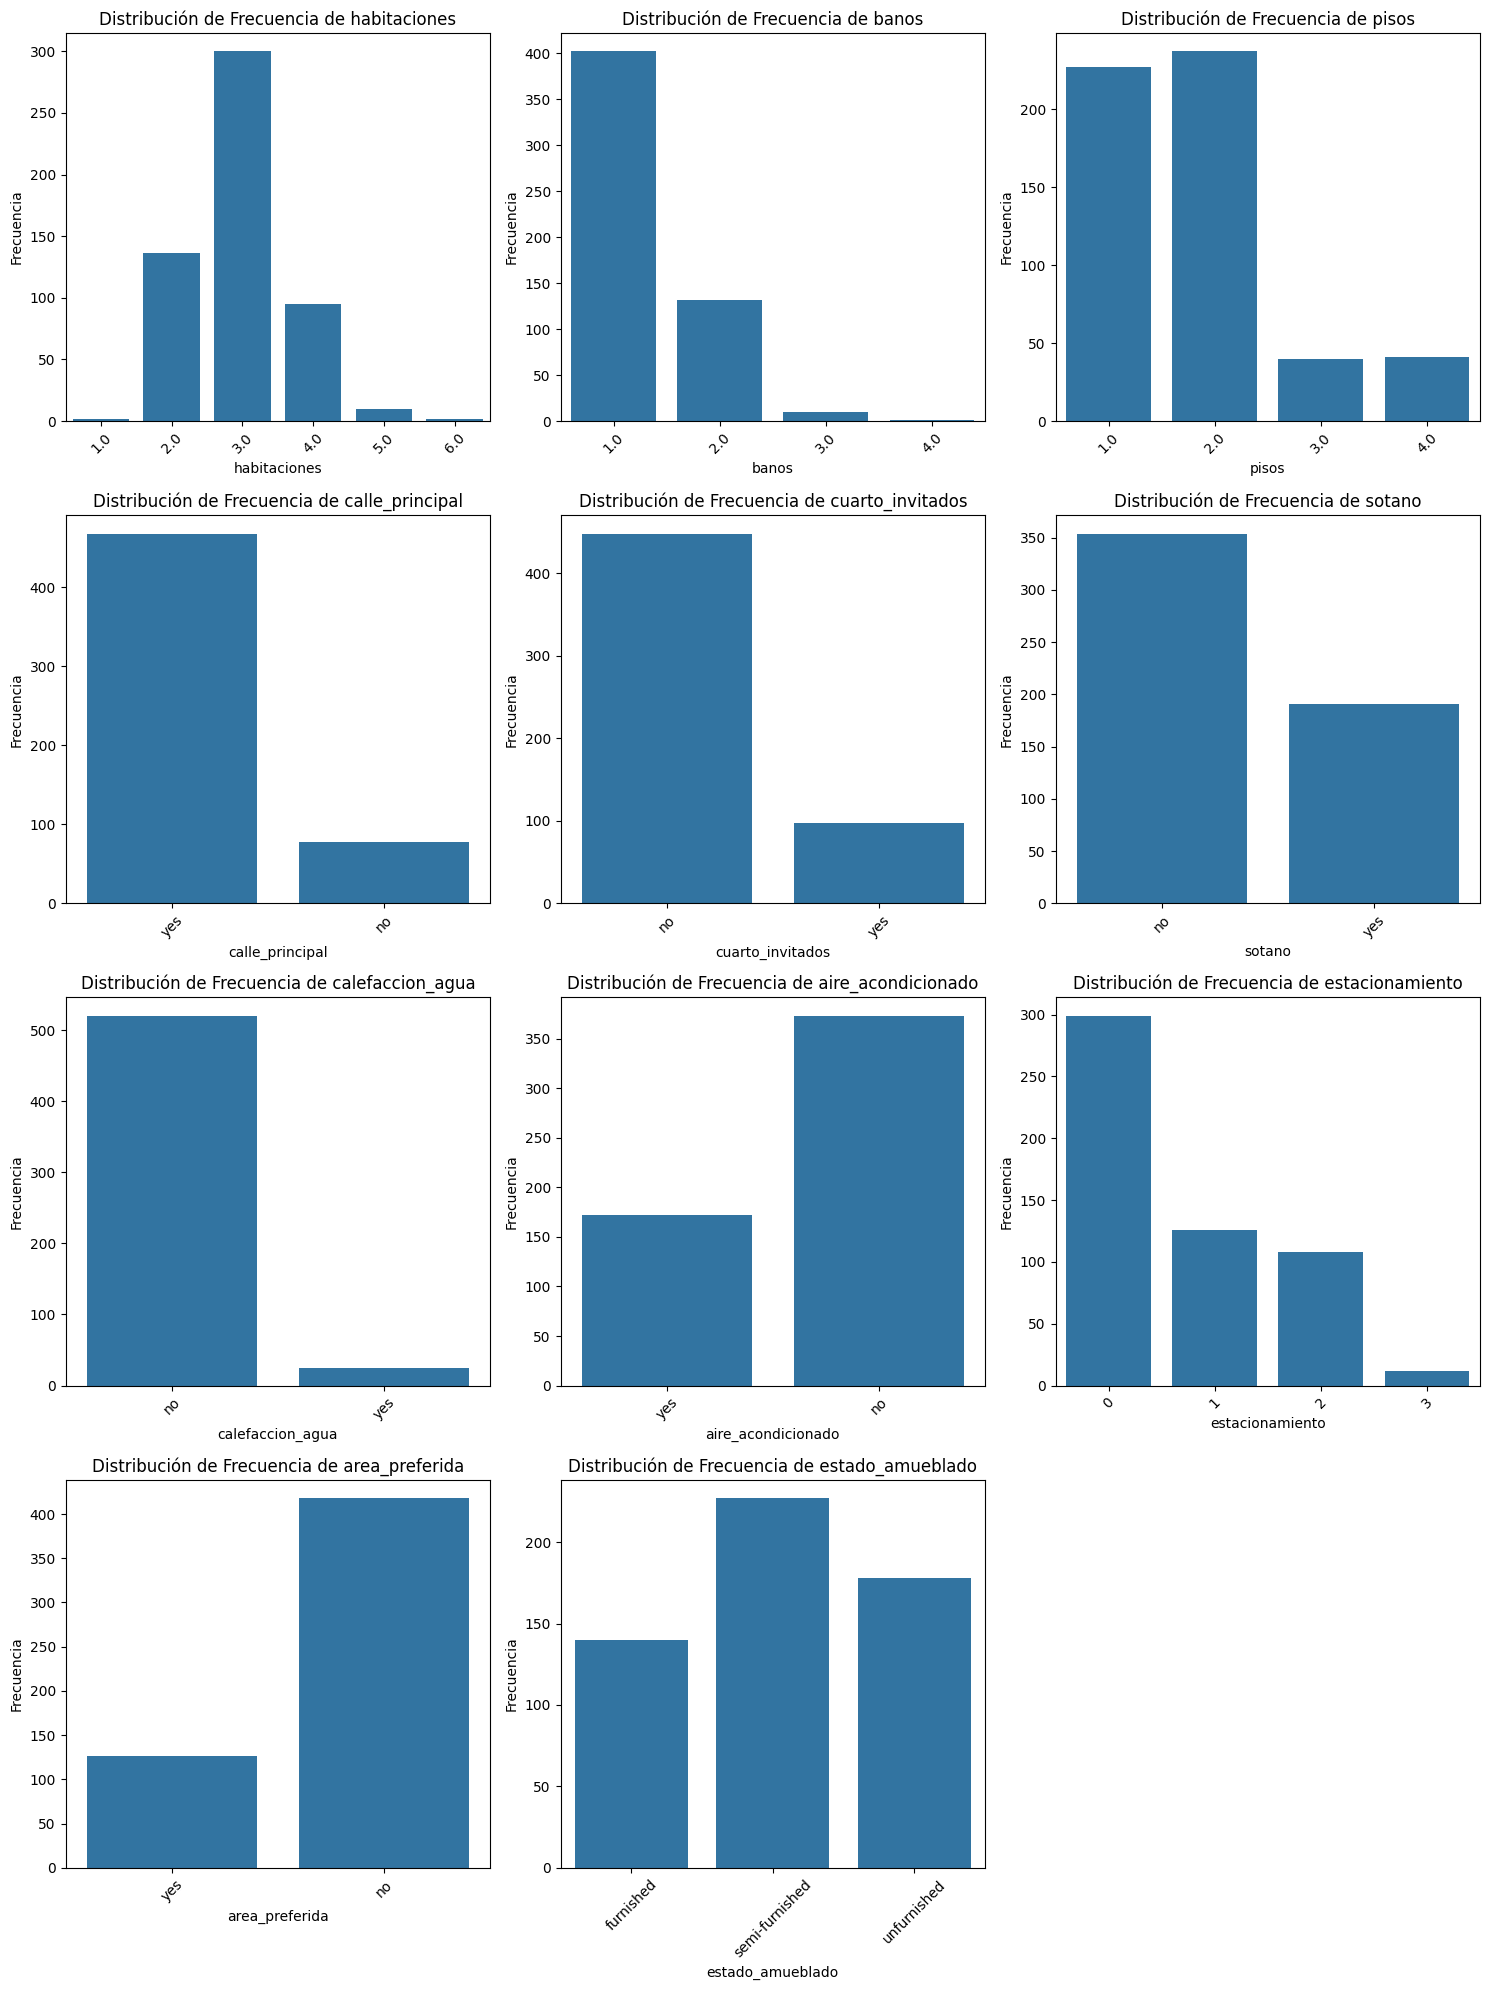

In [20]:
# Seleccionamos denuevo columnas menos precio y area y las guardamos en cols_to_plot porque les vamos a generar un grafico
cols_to_plot = [col for col in df.columns if col not in ['precio', 'area']]

# Definimos las columnas para el grid
n_cols = 3
n_rows = (len(cols_to_plot) + n_cols - 1) // n_cols

# sea hacen los subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten() #aplana los ejes para iterar facilmente

# se generan plots para cada columnas
for i, col in enumerate(cols_to_plot):
    sns.countplot(x=col, data=df, ax=axes[i])
    axes[i].set_title(f'Distribución de Frecuencia de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frecuencia')
    axes[i].tick_params(axis='x', rotation=45) # Rotamos x para que se puede leer mejor

# Removemos subplots vacios
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

 **Justificación técnica:** Describe aquí tu interpretación del resultado.

###  Tarea:  Numerización de variables binarias (yes/no) con OrdinalEncoder

- Las variables binarias a numerizar
- Definir transformador con OrdinalEncoder (yes=1, no=0)
Aplicar la transformación solo a las columnas binarias Ajustar y transformar el DataFrame
- Recuerda dejar el feature entero
- Guardar el transformador entrenado

In [21]:
# Define binary columns to encode
# Definimos las columnas binarias para el encode
binary_cols = ['calle_principal', 'cuarto_invitados', 'sotano', 'calefaccion_agua', 'aire_acondicionado', 'area_preferida']

# Define OrdinalEncoder with specified order (yes=1, no=0)
ordinal_encoder_binary = OrdinalEncoder(categories=[['no', 'yes']] * len(binary_cols), dtype=int)

# Apply transformation to binary columns
df[binary_cols] = ordinal_encoder_binary.fit_transform(df[binary_cols])

# Save the fitted encoder
joblib.dump(ordinal_encoder_binary, 'ordinal_encoder_binary.pkl')

# Display the transformed columns
display(df[binary_cols].head())

,calle_principal,cuarto_invitados,sotano,calefaccion_agua,aire_acondicionado,area_preferida
0,1,0,0,0,1,1
1,1,0,0,0,1,0
2,1,0,1,0,0,1
3,1,0,1,0,1,1
4,1,1,1,0,1,0


**Justificación técnica:** Describe aquí tu interpretación del resultado.

###  Tarea:  Numerización de 'estado_amueblado' con OrdinalEncoder y diccionario -

- Definir el orden deseado según el diccionario
- Crear el encoder con el orden definido Ajustar y transformar la columna
- Recuerda dejar el feature entero
- Guardar el encoder para persistencia Verificar la transformación

In [22]:
# Define the desired order for 'estado_amueblado'
furnishing_order = ['unfurnished', 'semi-furnished', 'furnished']

# Create the encoder with the defined order
ordinal_encoder_furnishing = OrdinalEncoder(categories=[furnishing_order], dtype=int)

# Fit and transform the 'estado_amueblado' column
df['estado_amueblado'] = ordinal_encoder_furnishing.fit_transform(df[['estado_amueblado']])

# Save the fitted encoder
joblib.dump(ordinal_encoder_furnishing, 'ordinal_encoder_furnishing.pkl')

# Verify the transformation
display(df[['estado_amueblado']].head())

,estado_amueblado
0,2
1,2
2,1
3,2
4,2


 **Justificación técnica:** Describe aquí tu interpretación del resultado.

In [ ]:
target = 'precio'
features = [i for i in df.columns if i not in [target]]

### Tarea: Mapa de correlación de todas las variables numéricas

- Calcular la matriz de correlación
- Configurar el tamaño de la figura
- Crear el mapa de calor Título del gráfico


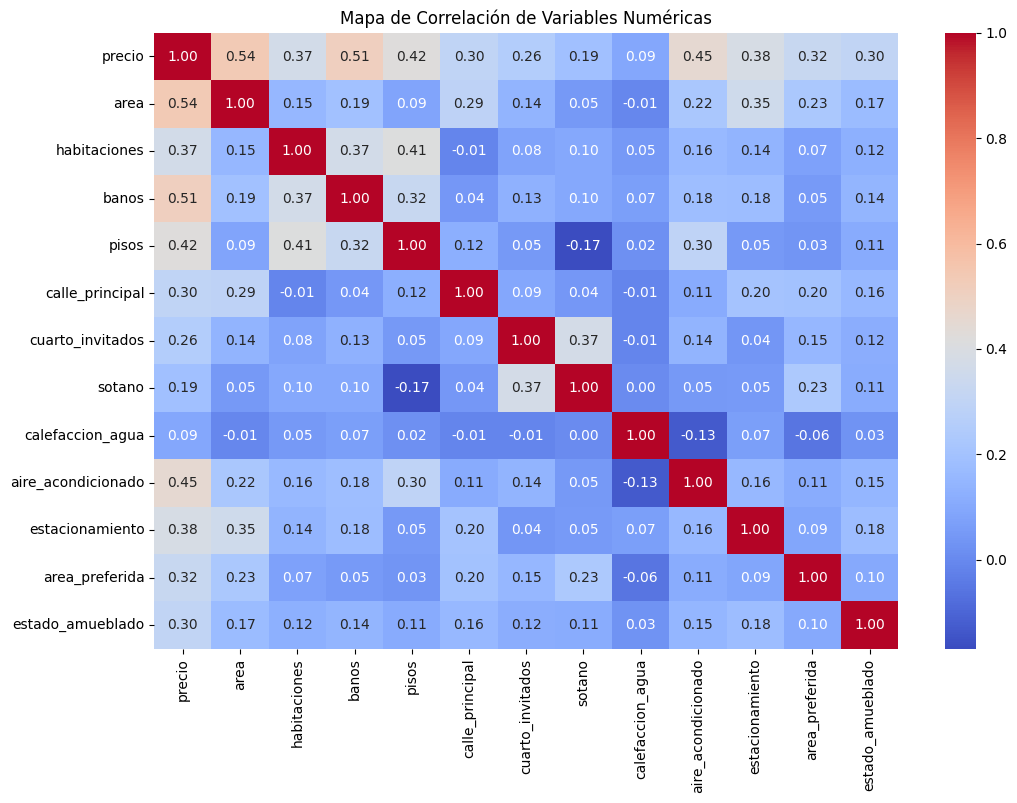

In [23]:
# Calculate the correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Configure the figure size
plt.figure(figsize=(12, 8))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Set the title
plt.title('Mapa de Correlación de Variables Numéricas')
plt.show()

**Justificación técnica:** Describe aquí tu interpretación del resultado.

---

# <center> 2. Exploratory Data Analysis (EDA)

### Tarea:  Analizar la distribución de la variable objetivo con 30 bins usado curva de densidad
Histograma con curva de densidad

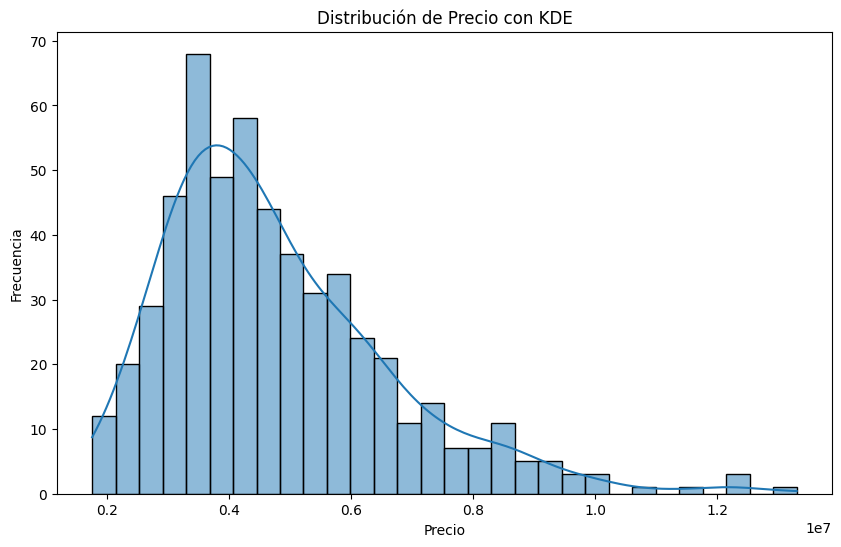

In [24]:
# Plot histogram with KDE for 'precio'
plt.figure(figsize=(10, 6))
sns.histplot(df['precio'], bins=30, kde=True)
plt.title('Distribución de Precio con KDE')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

 **Justificación técnica:** Describe aquí tu interpretación del resultado.

###  Tarea: Calcular el sesgo (skewness) de la variable 'precio'

In [25]:
# Calculate the skewness of 'precio'
skewness_precio = df['precio'].skew()
print(f"Skewness of 'precio': {skewness_precio}")

Skewness of 'precio': 1.2122388370279802


 **Justificación técnica:** Describe aquí tu interpretación del resultado.

###  Tarea:  Calcular la curtosis (kurtosis) de la variable 'precio'


In [27]:
# Calculate the kurtosis of 'precio'
kurtosis_precio = df['precio'].kurtosis()
print(f"Kurtosis of 'precio': {kurtosis_precio}")

Kurtosis of 'precio': 1.9601302314151994


In [28]:
# Calculate mean of 'precio'
mean_precio = df['precio'].mean()
print(f"Mean of 'precio': {mean_precio}")

# Calculate median of 'precio'
median_precio = df['precio'].median()
print(f"Median of 'precio': {median_precio}")

# Calculate mode of 'precio'
mode_precio = df['precio'].mode()[0]
print(f"Mode of 'precio': {mode_precio}")

Mean of 'precio': 4766729.247706422
Median of 'precio': 4340000.0
Mode of 'precio': 3500000


 **Justificación técnica:** Calculamos la media, mediana y moda con comandos.

 Tarea:  Calcular la media, mediana y moda


 Tarea:  Calcular la curtosis (kurtosis) de la variable 'precio'


```
# This is formatted as code
```

 **Justificación técnica:** Describe aquí tu interpretación del resultado.

###  Tarea:   Diagramas de caja y bigotes (3 por fila) excluyendo variables binarias
- Variables a excluir Seleccionar solo columnas numéricas, excluyendo las binarias
- Definir número de columnas en la cuadrícula
- Crear subplots Graficar cada boxplot
- Eliminar ejes vacíos

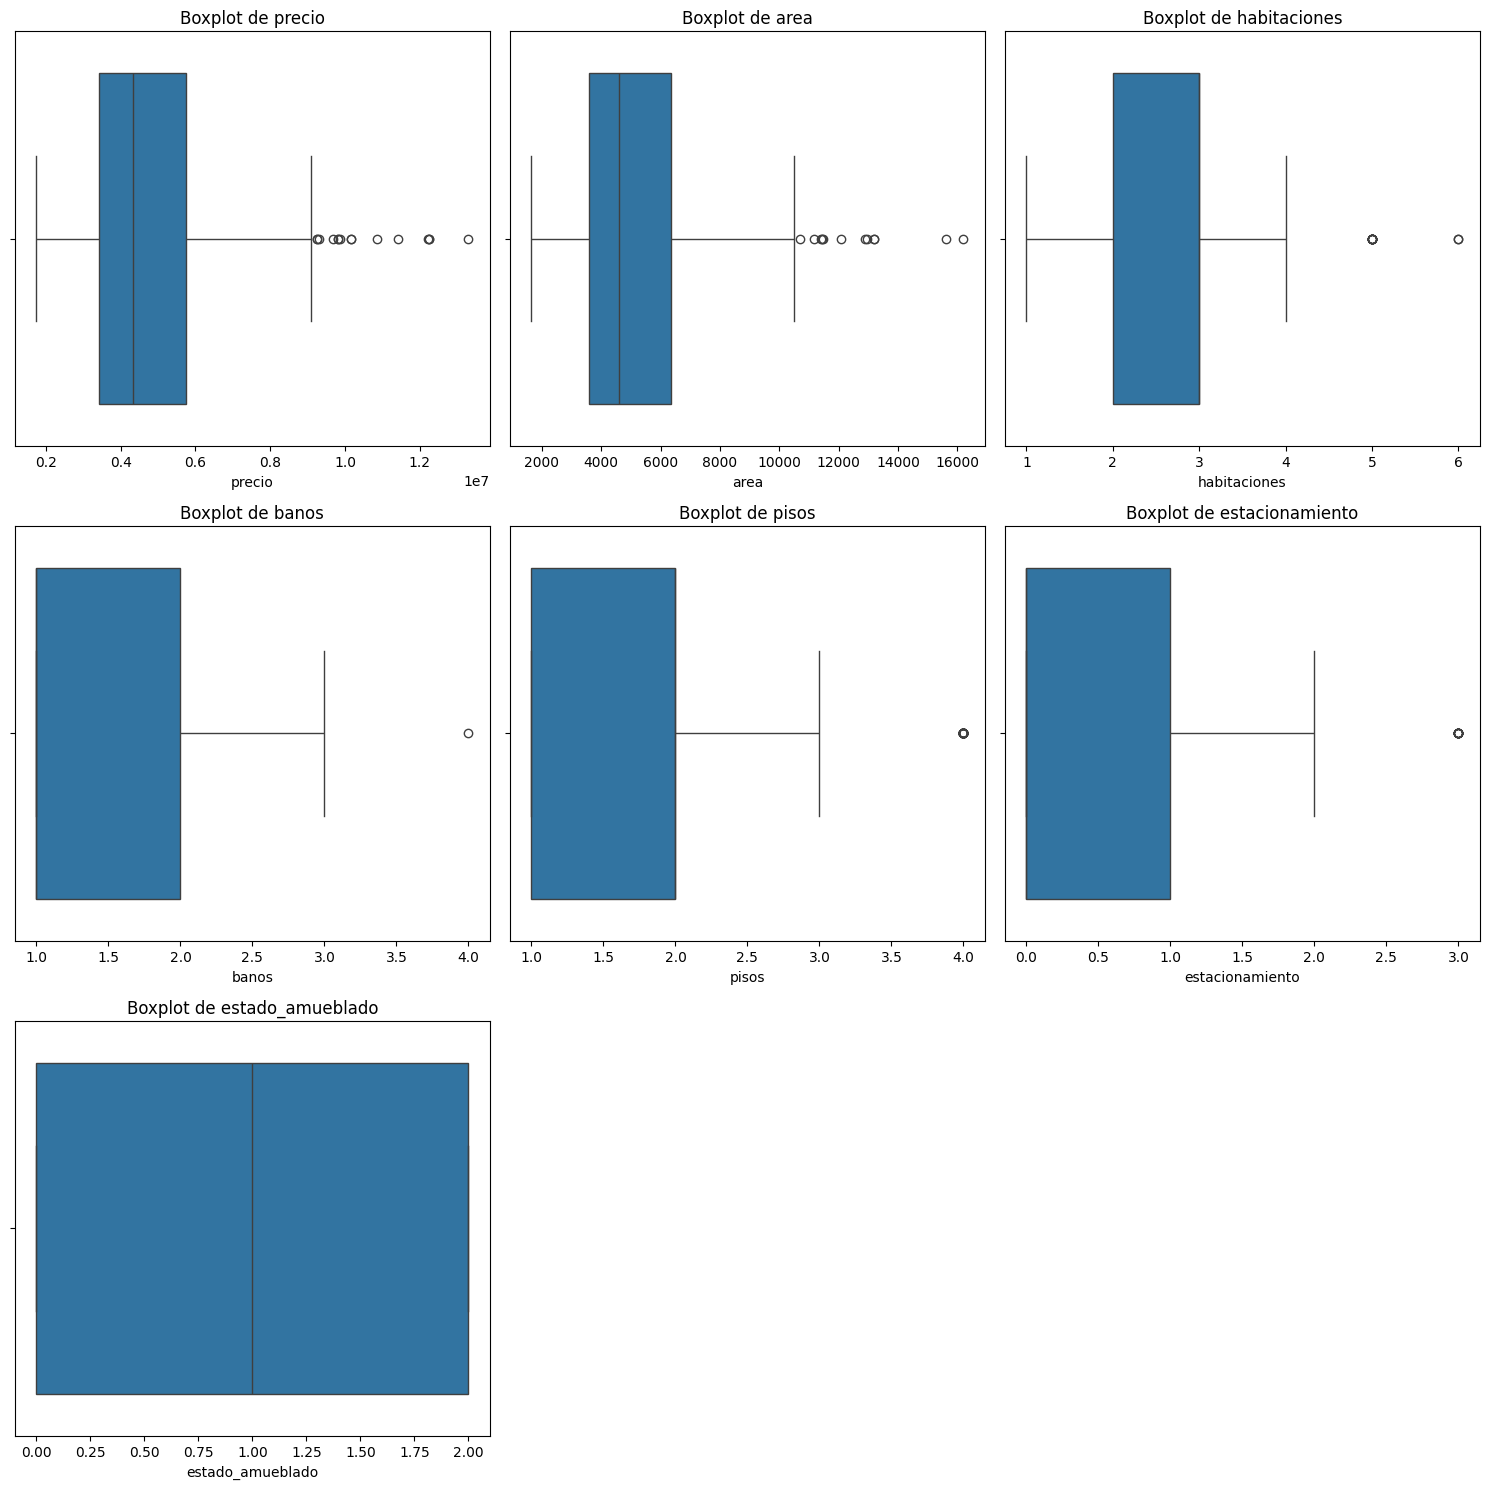

In [29]:
# Identify numerical columns (excluding binary which are now int64)
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

# Exclude columns that were originally binary and now encoded as 0 and 1
# We can identify them by checking if they only contain 0 and 1
non_binary_numerical_cols = [col for col in numerical_cols if not df[col].isin([0, 1]).all()]

# Define number of columns in the grid
n_cols = 3
n_rows = (len(non_binary_numerical_cols) + n_cols - 1) // n_cols

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten()

# Plot boxplot for each non-binary numerical column
for i, col in enumerate(non_binary_numerical_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot de {col}')
    axes[i].set_xlabel(col)

# Remove empty axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

 **Justificación técnica:** Describe aquí tu interpretación del resultado.

### Tarea: Eliminar outliers en la variable 'precio' usando IQR
- Calcular Q1 y Q3 Definir límite superior
- Filtrar filas (mantener solo precios dentro del rango aceptable)

In [30]:
# Calculate Q1 and Q3 for 'precio'
Q1 = df['precio'].quantile(0.25)
Q3 = df['precio'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper limit for outliers
upper_limit = Q3 + 1.5 * IQR

# Filter out rows where 'precio' is above the upper limit
df = df[df['precio'] <= upper_limit]

 **Justificación técnica:** Describe aquí tu interpretación del resultado.

###  Tarea: Boxplot de la variable 'precio'

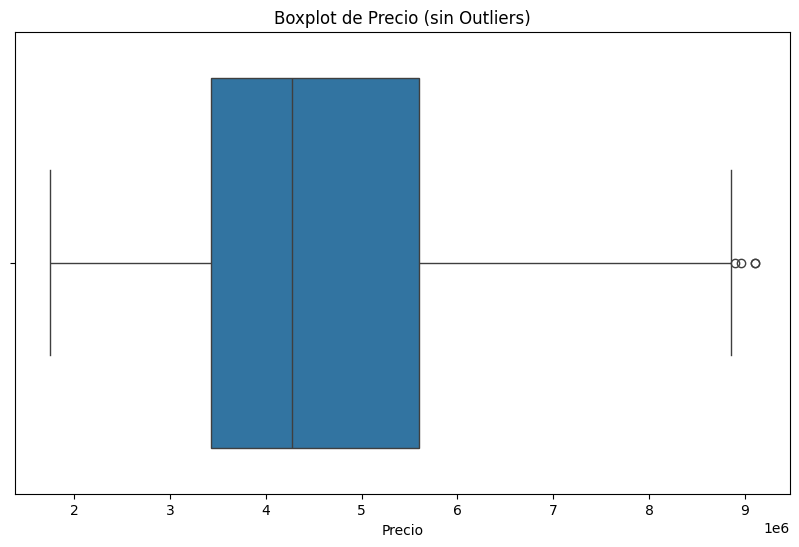

In [31]:
# Create a boxplot for 'precio'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['precio'])
plt.title('Boxplot de Precio (sin Outliers)')
plt.xlabel('Precio')
plt.show()

**Justificación técnica:** Describe aquí tu interpretación del resultado.

###Tarea: Nuevamente verifiquemos cómo quedó la distribución de frecuencia de la variable 'precio'

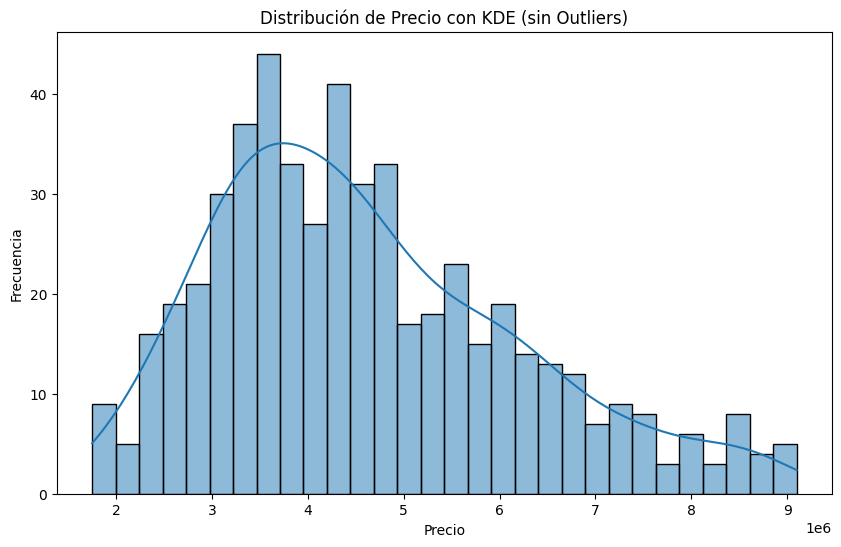

In [32]:
# Plot histogram with KDE for 'precio' after outlier removal
plt.figure(figsize=(10, 6))
sns.histplot(df['precio'], bins=30, kde=True)
plt.title('Distribución de Precio con KDE (sin Outliers)')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

 **Justificación técnica:** Describe aquí tu interpretación del resultado.

# <center> 4. Data Manipulation

###  Tarea: División del dataset en conjuntos de entrenamiento y prueba

- Reemplazar espacios en los nombres de columnas por "_"
- Separar variables predictoras (X) y variable objetivo (Y)
- Dividir los datos (80% entrenamiento, 20% prueba)

In [33]:
# Replace spaces in column names with underscores
df.columns = df.columns.str.replace(' ', '_')

# Separate features (X) and target (Y)
target = 'precio'
features = [col for col in df.columns if col != target]
X = df[features]
y = df[target]

# Split the data into training and testing sets (80% train, 20% test) with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (424, 12)
Shape of X_test: (106, 12)
Shape of y_train: (424,)
Shape of y_test: (106,)


 **Justificación técnica:** Describe aquí tu interpretación del resultado.

### Tarea:  Escalado de características (Estandarización)
- Inicializamos el escalador
- Estandarización del conjunto de entrenamiento
- Estandarización del conjunto de prueba ----

In [34]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Standardize the training set
X_train_scaled = scaler.fit_transform(X_train)

# Standardize the testing set
X_test_scaled = scaler.transform(X_test)

 **Justificación técnica:** Describe aquí tu interpretación del resultado.

### Tarea:   Guardar y cargar el modelo de normalización
- Guardar el modelo entrenado de StandardScaler

In [35]:
# Save the fitted StandardScaler model
joblib.dump(scaler, 'standard_scaler.pkl')

['standard_scaler.pkl']

**Justificación técnica:** Describe aquí tu interpretación del resultado.

###  Tarea:  Varianza en decimales con 6 cifras


In [36]:
# Calculate the variance of the scaled training data
variance = X_train_scaled.var(axis=0)

# Display the variance with 6 decimal places
print("Variance of scaled training data:")
display(np.round(variance, 6))

Variance of scaled training data:


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

 **Justificación técnica:** Describe aquí tu interpretación del resultado.

---

### Tarea:  Reducción de características con VarianceThreshold

- Definir el umbral (ej: 0.01)
- Ajustar en los datos normalizados de entrenamiento Columnas seleccionadas
- Convertir a DataFrame

In [37]:
# Define the threshold
selector = VarianceThreshold(threshold=0.01)

# Fit on the normalized training data
selector.fit(X_train_scaled)

# Get the indices of the selected features
selected_features_mask = selector.get_support()

# Get the names of the selected columns from the original DataFrame's columns
selected_columns = X_train.columns[selected_features_mask]

# Transform the scaled training data to keep only the selected features
X_train_reduced = selector.transform(X_train_scaled)

# Convert the reduced training data back to a DataFrame
X_train_reduced = pd.DataFrame(X_train_reduced, columns=selected_columns, index=X_train.index)

# Display the shape of the reduced training data
print("Shape of reduced training data:", X_train_reduced.shape)

# Display the selected columns
print("\nSelected features:")
display(selected_columns)

Shape of reduced training data: (424, 12)

Selected features:


Index(['area', 'habitaciones', 'banos', 'pisos', 'calle_principal',
       'cuarto_invitados', 'sotano', 'calefaccion_agua', 'aire_acondicionado',
       'estacionamiento', 'area_preferida', 'estado_amueblado'],
      dtype='object')

**Justificación técnica:** Describe aquí tu interpretación del resultado.

# <font color="green"> Conclusión General --Obligatorio--</font>

*Agrega una sección al final de tu script donde resumas los principales pasos realizados, las decisiones clave tomadas y el estado final del dataset preprocesado. Esto ayudará a otros a entender tu trabajo y a reutilizar tu código más fácilmente.
Podrías mencionar posibles pasos futuros, como la selección de características o la construcción de modelos.*

# Conclusión General

En este taller, hemos realizado una serie de pasos esenciales para preprocesar y preparar el dataset de vivienda para el modelado. Hemos abordado la carga y exploración inicial de los datos, incluyendo la inspección de las primeras filas, dimensiones y tipos de datos. Se han traducido los nombres de las columnas a español para mayor claridad.

Identificamos y manejamos los valores nulos mediante la imputación con valores fijos para algunas columnas numéricas y la moda para las variables categóricas, verificando que no quedaron valores faltantes.

Realizamos un análisis exploratorio de datos (EDA) centrándonos en la variable objetivo 'precio', visualizando su distribución con histogramas y KDE, y calculando medidas estadísticas como la media, mediana, moda, asimetría y curtosis. También visualizamos la distribución de otras variables numéricas y categóricas mediante boxplots y gráficos de barras.

Aplicamos el método IQR para identificar y eliminar outliers en la variable 'precio', lo que resultó en una distribución más acotada y menos sesgada, como se observó en los gráficos posteriores.

Procedimos a la manipulación de datos, incluyendo la numerización de variables binarias y la columna 'estado_amueblado' utilizando OrdinalEncoder, guardando los transformadores para su uso futuro. Se reemplazaron los espacios en los nombres de las columnas por guiones bajos para facilitar el acceso a las columnas.

Finalmente, se dividió el dataset en conjuntos de entrenamiento y prueba utilizando una división estratificada para mantener la proporción de la variable objetivo. Se escalaron las características utilizando StandardScaler y se guardó el escalador entrenado. Se verificó la varianza de los datos escalados y se aplicó VarianceThreshold para la reducción de características, aunque en este caso no se eliminaron columnas con el umbral definido.

El dataset preprocesado (`X_train_reduced`, `X_test_scaled`, `y_train`, `y_test`) está ahora listo para la etapa de construcción de modelos.

**Próximos pasos potenciales:**

1.  **Selección de características más avanzada:** Explorar otros métodos de selección de características como la selección basada en modelos o métodos univariados para identificar las variables más relevantes para la predicción del precio.
2.  **Ingeniería de características (Feature engineering):** Crear nuevas características a partir de las existentes que puedan capturar mejor la información y mejorar el rendimiento del modelo.
3.  **Modelado:** Entrenar diferentes modelos de regresión (por ejemplo, Regresión Lineal, Árboles de Decisión, Random Forest, Gradient Boosting) en el conjunto de entrenamiento preprocesado.
4.  **Evaluación del modelo:** Evaluar el rendimiento de los modelos entrenados utilizando métricas apropiadas para problemas de regresión (por ejemplo, MAE, MSE, R²).
5.  **Ajuste de hiperparámetros:** Optimizar los hiperparámetros de los modelos seleccionados para mejorar su rendimiento.
6.  **Interpretación del modelo:** Analizar los modelos para entender qué características son más importantes para predecir el precio de la vivienda.

### Tarea: <<<------------------THE END------------------------->>>